In [1]:
# couple issues that I've seen. Single images are not enough to allow a classification
# we might need 24 images per day to get a daily average
# other problems might be the time of day? perhaps dark images are not useful?

In [46]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf
import src.tools as tools
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
stations = ['ParkersBrook','BrownsBrook','GrantPoole']
station_name = stations[2]

wd = f'/datadrive/stream_data/training/{station_name}'
bins = ['train', 'val', 'test']
data ={}
for b in bins:
    datatable_name = f'{wd}/{b}_table.csv'
    data[b] = pd.read_csv(datatable_name)

In [48]:
#lets get the y data
train_dataset = tools.create_regression_data_from_dataframe(data['train'])
val_dataset = tools.create_regression_data_from_dataframe(data['val'])
#test_dataset = tools.create_regression_data_from_dataframe(data['test'])

In [49]:
#input_shape = Xtrain[0].shape
input_shape = (480, 640, 3)

In [50]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_addons as tfa
num_classes = 1

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [51]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=tfa.metrics.RSquare(dtype=tf.float32, y_shape=(1,)))

In [52]:
epochs = 30
batch_size = 10
history = model.fit(train_dataset.shuffle(20).padded_batch(batch_size),\
                    validation_data=val_dataset.batch(batch_size),\
                    epochs=epochs)

Epoch 1/30
56/56 [==============================] - 9s 154ms/step - loss: 61.6030 - r_square: -334.1776 - val_loss: 0.1894 - val_r_square: 0.0785
Epoch 2/30
56/56 [==============================] - 9s 152ms/step - loss: 0.1335 - r_square: 0.2734 - val_loss: 0.1083 - val_r_square: 0.4728
Epoch 3/30
56/56 [==============================] - 8s 152ms/step - loss: 0.0693 - r_square: 0.6229 - val_loss: 0.0958 - val_r_square: 0.5341
Epoch 4/30
56/56 [==============================] - 9s 152ms/step - loss: 0.0411 - r_square: 0.7762 - val_loss: 0.0717 - val_r_square: 0.6512
Epoch 5/30
56/56 [==============================] - 8s 150ms/step - loss: 0.0248 - r_square: 0.8652 - val_loss: 0.0622 - val_r_square: 0.6974
Epoch 6/30
56/56 [==============================] - 9s 153ms/step - loss: 0.0191 - r_square: 0.8960 - val_loss: 0.0525 - val_r_square: 0.7445
Epoch 7/30
56/56 [==============================] - 9s 152ms/step - loss: 0.0157 - r_square: 0.9145 - val_loss: 0.0467 - val_r_square: 0.7726
Ep

In [53]:
modelname = 'simple_cnn_regression'
pd.DataFrame(history.history).to_csv(f'/datadrive/model/{station_name}/{modelname}/history/{modelname}.csv')
model.save(f'/datadrive/model/{station_name}/{modelname}/weights/{modelname}.h5') 
jsonfile = f'/datadrive/model/{station_name}/{modelname}/weights/{modelname}.json'
model_json = model.to_json()
with open(jsonfile, "w") as json_file:
    json_file.write(model_json)

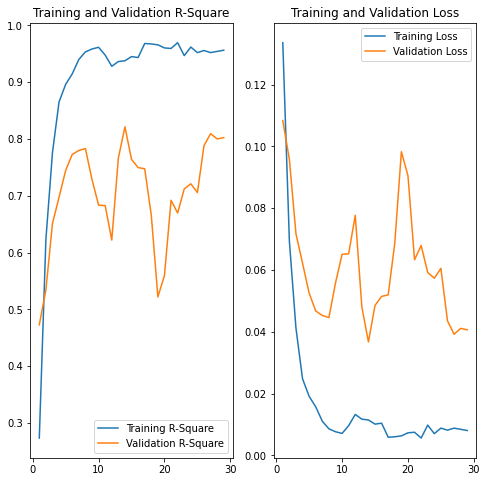

In [54]:
acc = history.history['r_square'][1:]
val_acc = history.history['val_r_square'][1:]

loss = history.history['loss'][1:]
val_loss = history.history['val_loss'][1:]

epochs_range = range(epochs)[1:]

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training R-Square')
plt.plot(epochs_range, val_acc, label='Validation R-Square')
plt.legend(loc='lower right')
plt.title('Training and Validation R-Square')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
test = test_dataset.take(1)

In [20]:
for im, label in test:
    print(im, label)

tf.Tensor(
[[[0.26666668 0.34117648 0.23137255]
  [0.22352941 0.29803923 0.18039216]
  [0.3529412  0.41960785 0.29411766]
  ...
  [0.08627451 0.10980392 0.07058824]
  [0.1882353  0.21176471 0.17254902]
  [0.24313726 0.26666668 0.22745098]]

 [[0.25490198 0.32941177 0.21960784]
  [0.16862746 0.24313726 0.1254902 ]
  [0.24705882 0.30980393 0.19607843]
  ...
  [0.09411765 0.11764706 0.07843138]
  [0.15294118 0.1764706  0.13725491]
  [0.33333334 0.35686275 0.31764707]]

 [[0.23921569 0.3137255  0.20392157]
  [0.27450982 0.34901962 0.23137255]
  [0.2901961  0.3529412  0.23921569]
  ...
  [0.16862746 0.19215687 0.14509805]
  [0.41960785 0.44313726 0.40392157]
  [0.44313726 0.46666667 0.42745098]]

 ...

 [[0.07450981 0.07450981 0.07450981]
  [0.05490196 0.05490196 0.05490196]
  [0.09411765 0.09411765 0.09411765]
  ...
  [0.11764706 0.11764706 0.11764706]
  [0.02352941 0.02352941 0.02352941]
  [0.1254902  0.1254902  0.1254902 ]]

 [[0.09803922 0.09803922 0.09803922]
  [0.10980392 0.10980392 0